In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Mecab
from konlpy.tag import Komoran
from konlpy.tag import Okt
import re

In [4]:
df = pd.read_csv('datas/PPTIcsv.csv')

In [5]:
df5 = df[df.rating == 5]
df4 = df[df.rating == 4]
df3 = df[df.rating == 3]
df2 = df[df.rating == 2]
df1 = df[df.rating == 1]

별점 물리적 평균 내기

In [4]:
values = [len(df[df.rating == 1]),
         len(df[df.rating == 2]),
         len(df[df.rating == 3]),
        len(df[df.rating == 4]),
        len(df[df.rating == 5])]

In [85]:
np.mean(df.rating)

4.008300590668991

In [86]:
ratings = [1, 2, 3, 4, 5]

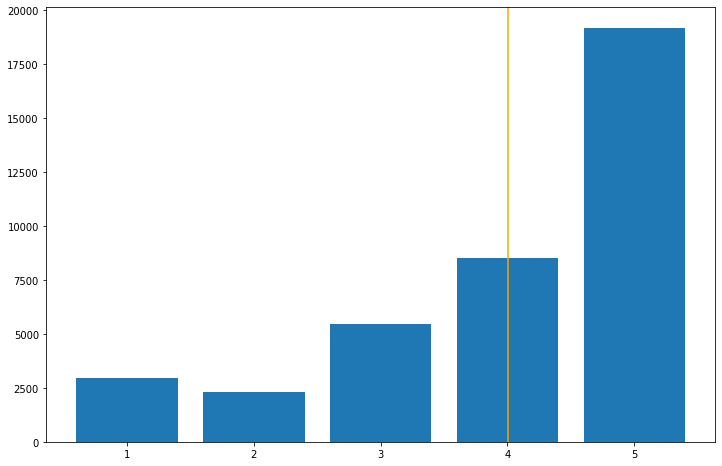

In [87]:
plt.figure(figsize = (12,8))

plt.bar(ratings, values)
plt.axvline(np.mean(df.rating), color='orange')

plt.show()

긍정/부정 라벨링

In [6]:
pos_df = pd.concat([df4,df5]).reset_index().drop(columns=['index'])
neg_df = pd.concat([df1,df2,df3]).reset_index().drop(columns=['index'])

In [7]:
pos_df['label'] = 1
neg_df['label'] = 0

In [8]:
reviews = pd.concat([pos_df,neg_df])

In [9]:
reviews = reviews.drop(['Unnamed: 0'],axis=1)

 전처리

In [10]:
mecab = Mecab()


def me_tokenizer(text):
    tokens_ko = mecab.morphs(text)
    return tokens_ko

def preprocessing(text):
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [11]:
fr = open('stopwords.txt', 'r')
stopwords = fr.read()
print(stopwords)
fr.close()

stopwords = []
for word in stopwords:
    stop_words.append(word)

의,가,이,은,들,는,좀,잘,과,도,를,으로,자,에,것,까지,을,적,',수,와,한,하다,에는,것은,에게,관,.,로,인,경우,권,하,),(,",중,이다,,,되다,하고,되다,에서,김,통해,김, 명,있다,없다,중,돼다,받다,따르다,장,명,ㅡㅡ,ㅜ,ㅠ,ㅡ,_시,분,',~,방구,니,로라,튼,엔,이,콕콕,벌렁,?,분,접,ㅜㅜ,ㅠㅠ,ㅜㅡ,ㅡㅜ,ㅠㅜ,ㅜㅠ,거,것,빈,때,게,중,빈,저,때,하루,후기,커피,우유,키,쉐이크,달,,!,!!,!!!,!!!!,!!!!!,!!!!!!,!^^,#,%,&,*,**,***,+,-,-),-------------------------,->,.!,.!!,.(,.),..,..(,..),...,....,.....,......,.......,........,.........,..........,...?,..?,..^^,.?,.^^,/,:,;,;;,;;;,;;;;,;;;;;,<,=,>,><,?,??,???,@,[,],^,^-^,^^,^^!,^^*,^^;,^^;;,^^;;;,^^~~,^^♡,^_^,_,~!,~!!,~!!!,~.,~...,~?,~^^,~^^;;,~~,~~!,~~!!,~~!!!,~~^^,~~~,~~~^^,~~~~,~~~~~,~~~~~~,~~♡,~♡, ,×,ᆢ,•,‥,※,●,★,☆,♡,♡♡,♥,✔,❤,⭐,!!!!!!!,!!!^^,!!^^,!(,!),!?,(?),),,,,,,,,,,,,,,,.,.*,.,,.-,..!,..!!,...!,...(,...),...^^,//,:),:-),?!,????,^^~,a,b,c,cla,x,~(,♡♡♡,✔️,❤️,ㄱ,ㄴ,ㄷ,ㄷㄷ,ㄹㅇ,ㅁ,ㅂ,ㅅ,ㅇ,ㅇㅅㅇ,ㅈ,ㅋ,ㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,ㅎ,)-,,,,,,,...........,....?,...;;,ㅎㅎㅎ,ㅎㅎㅎㅎ,ㅎㅎㅎㅎㅎ,ㅎㅎㅎㅎㅎㅎ,ㅏ,ㅛ,ㅜㅜㅜ,ㅜㅜㅜㅜ,ㅠㅠㅠ,ㅠㅠㅠㅠ,ㅠㅠㅠㅠㅠ,ㅠㅠㅠㅠㅠㅠ,ㅠㅡㅠ,ㅡㅡㅋ,ㅣ,겉,겟,겨,결,겹,경,고,뇌,뇨,누,론,료,루,룩,류,르

In [12]:
reviews

,title,rating,review,date,label,pred
0,"클린24시간 탄수화물 차단 다이어트 쾌변 보조 식품, 100ml, 5개입",4,상품평 보고 구매하게 됐어요 개인마다 차이가 있겠지만 저는 첫날에는 아무 반응이 없...,2020.06.04,1,0
1,"클린24시간 탄수화물 차단 다이어트 쾌변 보조 식품, 100ml, 5개입",4,대변 보려고 산건데 딱히배가 너무 아팠어요 ㅠㅠ,2020.10.22,1,0
2,"클린24시간 탄수화물 차단 다이어트 쾌변 보조 식품, 100ml, 5개입",4,몸 가볍게 하려고 구입했는데 하루 먹고 변은 안나오고 배만 가스차서 복어처럼 되면서...,2020.06.30,1,0
3,"클린24시간 탄수화물 차단 다이어트 쾌변 보조 식품, 100ml, 5개입",4,저는 별 효과가 없네요ㅜ 후기보고 기대하고 주문했는데ㅜ처음 먹고 한번 화장실가고는...,2020.02.07,1,0
4,"클린24시간 탄수화물 차단 다이어트 쾌변 보조 식품, 100ml, 5개입",4,잘모르겠어요 흠,2020.08.07,1,0
...,...,...,...,...,...,...
10686,송원 몸이좋아하는 마테차 100T/우엉차/녹차,3,좋아요 사용자 연령대 사용용도 다이어트그 외 도움...,2013.08.27,0,1
10687,송원 몸이좋아하는 마테차 100T/우엉차/녹차,3,맛있어요 ㅎ 사용자 연령대 사용용도 그 외 도움이 될 만한 사용후기 첨에...,2014.05.03,0,1
10688,송원 몸이좋아하는 마테차 100T/우엉차/녹차,3,좋아요 좋아요 좋아요 좋아요 사용자 연령대 사용용도 차그 외 도움이...,2012.08.16,0,1
10689,송원 몸이좋아하는 마테차 100T/우엉차/녹차,3,다이어트하기엔 딱 ㅋ 재구매횟수 또는 기간 예 번째 구매 년째 단골맛 ...,2012.07.06,0,1


In [13]:
reviews['review']

0        상품평 보고 구매하게 됐어요 개인마다 차이가 있겠지만 저는 첫날에는 아무 반응이 없...
1                            대변 보려고 산건데    딱히배가 너무 아팠어요 ㅠㅠ
2        몸 가볍게 하려고 구입했는데 하루 먹고 변은 안나오고 배만 가스차서 복어처럼 되면서...
3        저는 별 효과가 없네요ㅜ 후기보고 기대하고 주문했는데ㅜ처음 먹고  한번 화장실가고는...
4                                                잘모르겠어요  흠
                               ...                        
10686    좋아요              사용자 연령대     사용용도   다이어트그 외 도움...
10687    맛있어요 ㅎ 사용자 연령대   사용용도   그 외 도움이 될 만한 사용후기   첨에...
10688    좋아요  좋아요  좋아요 좋아요  사용자 연령대     사용용도   차그 외 도움이...
10689    다이어트하기엔 딱  ㅋ 재구매횟수 또는 기간   예   번째 구매   년째 단골맛 ...
10690    똥 잘싸야 살이 안찐다 먹는것만치 비우는것도 중요  카스피해 유산균 몇년째인데   ...
Name: review, Length: 38431, dtype: object

In [17]:
reviews['review'] = reviews['review'].apply(preprocessing)
reviews['review'] = reviews['review'].apply(lambda x : re.sub(r"\d+", " ", x))

/home/ristajc/anaconda3/envs/dss/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ristajc/anaconda3/envs/dss/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
from sklearn.model_selection import train_test_split

features = reviews['review']
labels = reviews['label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,
                                                    random_state=13) 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer(tokenizer=me_tokenizer, stop_words=stopwords,
                            ngram_range=(1,3), min_df=10, )
tfidfv.fit(X_train)
tfidf_matrix_train = tfidfv.transform(X_train)

/home/ristajc/anaconda3/envs/dss/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=13)

In [21]:
#confusion_matrix구하는 함수
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

from sklearn.metrics import confusion_matrix


def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    
    
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))
    print('=======================================')

In [22]:
from sklearn.metrics import accuracy_score

sgd_clf.fit(tfidf_matrix_train, y_train)
tfidf_matrix_test = tfidfv.transform(X_test)
pred = sgd_clf.predict(tfidf_matrix_train)
tpred= sgd_clf.predict(tfidf_matrix_test)
    
print('train : ',accuracy_score(y_train, pred),'test: ',accuracy_score(y_test,tpred))

train :  0.8800130208333333 test:  0.8419270833333333


In [23]:
print_clf_eval(y_train, pred), print_clf_eval(y_test, tpred)

=> confusion matrix
[[ 5444  3090]
 [  596 21590]]
Accuracy: 0.8800, Precision: 0.8748
Recall: 0.9731, F1: 0.9214, AUC:0.8055
=> confusion matrix
[[1169  979]
 [ 235 5297]]
Accuracy: 0.8419, Precision: 0.8440
Recall: 0.9575, F1: 0.8972, AUC:0.7509


(None, None)

K-fold 교차검증

In [24]:
from sklearn.model_selection import cross_val_score
print('train :',cross_val_score(sgd_clf, tfidf_matrix_train, y_train, cv=5, scoring="accuracy"))

train : [0.83984375 0.83902995 0.83691406 0.84082031 0.85026042]


In [25]:
print('train :',cross_val_score(sgd_clf, tfidf_matrix_train, y_train, cv=5, scoring="accuracy").mean(),
      'test :',accuracy_score(y_test,tpred))

train : 0.8413736979166666 test : 0.8419270833333333


In [26]:
print('과적합여부 : ',(accuracy_score(y_test,tpred) - \
       cross_val_score(sgd_clf, tfidf_matrix_train, y_train, cv=5, scoring="accuracy").mean()) * 100, '%' )

과적합여부 :  0.05533854166667185 %


다양한 함수적용

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [28]:
sgd_clf = SGDClassifier(random_state=13)
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=13)
rnd_clf = RandomForestClassifier(max_depth=6,  n_estimators=400, random_state=13)
NB_clf = MultinomialNB()
knc_clf = KNeighborsClassifier(n_neighbors=9)


voting_clf = VotingClassifier(
    estimators=[('sgb', sgd_clf), ('tree', tree_clf),
                   ('rnd', rnd_clf), ('NB', NB_clf), ('knc', knc_clf)], 
                voting='hard')
voting_clf.fit(tfidf_matrix_train, y_train)

VotingClassifier(estimators=[('sgb', SGDClassifier(random_state=13)),
                             ('tree',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=13)),
                             ('rnd',
                              RandomForestClassifier(max_depth=6,
                                                     n_estimators=400,
                                                     random_state=13)),
                             ('NB', MultinomialNB()),
                             ('knc', KNeighborsClassifier(n_neighbors=9))])

train_datas

In [29]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.metrics import confusion_matrix

def get_clf_eval(y_train, pred):
    acc = accuracy_score(y_train, pred)
    pre = precision_score(y_train, pred)
    re = recall_score(y_train, pred)
    f1 = f1_score(y_train, pred)
    auc = roc_auc_score(y_train, pred)
    
    return acc, pre, re, f1, auc


def print_clf_eval(y_train, pred):
    confusion = confusion_matrix(y_train, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_train, pred)
    
    print('=> confusion matrix')
    print(confusion)
    
    
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))
    print('=======================================')

In [30]:
for clf in (sgd_clf, tree_clf, rnd_clf, NB_clf, knc_clf, voting_clf):
    clf.fit(tfidf_matrix_train, y_train)
    pred = clf.predict(tfidf_matrix_train)
    
    print(clf.__class__.__name__, accuracy_score(y_train, pred))
    print_clf_eval(y_train, pred)
    print('---------------------------------------')

SGDClassifier 0.8800130208333333
=> confusion matrix
[[ 5444  3090]
 [  596 21590]]
Accuracy: 0.8800, Precision: 0.8748
Recall: 0.9731, F1: 0.9214, AUC:0.8055
---------------------------------------
DecisionTreeClassifier 0.7681966145833333
=> confusion matrix
[[ 3163  5371]
 [ 1750 20436]]
Accuracy: 0.7682, Precision: 0.7919
Recall: 0.9211, F1: 0.8516, AUC:0.6459
---------------------------------------
RandomForestClassifier 0.7222005208333333
=> confusion matrix
[[    0  8534]
 [    0 22186]]
Accuracy: 0.7222, Precision: 0.7222
Recall: 1.0000, F1: 0.8387, AUC:0.5000
---------------------------------------
MultinomialNB 0.8591145833333333
=> confusion matrix
[[ 4805  3729]
 [  599 21587]]
Accuracy: 0.8591, Precision: 0.8527
Recall: 0.9730, F1: 0.9089, AUC:0.7680
---------------------------------------
KNeighborsClassifier 0.7557942708333333
=> confusion matrix
[[ 2406  6128]
 [ 1374 20812]]
Accuracy: 0.7558, Precision: 0.7725
Recall: 0.9381, F1: 0.8473, AUC:0.6100
--------------------

### G마켓 적용
- 별점없는 리뷰, 긍정 부정 예측

In [29]:
gmarket = pd.read_csv('datas/test1.csv')

In [30]:
gmarket.drop(columns=['Unnamed: 0'])

,title,date,rating,review
0,[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분,{'2020.09.26'},-,다욧위해 열시미 먹고있어요
1,[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분,{'2020.09.23'},-,뉴트리 디데이 다이어트
2,[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분,{'2020.09.23'},-,뉴트리디데이 다이어트 .
3,[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분,{'2020.09.19'},-,저는딸과함께먹는데브ㅡㄱ용한지는오래되었고요.딸도먹일정도로안전하고효과도잘보고있는데쿠폰행...
4,[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분,{'2020.09.19'},-,효과 기대되네요 빠른 배송 감사합니다
...,...,...,...,...
10828,[순수식품] 진짜 석류 콜라겐 젤리 스틱 3박스(총 45포) 300달톤,{'2020.11.06'},-,잘 받으셨다요\n엄마가 간식으로 즐겨드심
10829,[순수식품] 진짜 석류 콜라겐 젤리 스틱 3박스(총 45포) 300달톤,{'2020.11.06'},-,배송 빠르고 저렴합니다
10830,[순수식품] 진짜 석류 콜라겐 젤리 스틱 3박스(총 45포) 300달톤,{'2020.11.06'},-,엄마 드시라고 한박스 더 주문합니다
10831,[순수식품] 진짜 석류 콜라겐 젤리 스틱 3박스(총 45포) 300달톤,{'2020.11.06'},-,탱글탱글 쫀득쫀득 맛나네요


In [32]:
gmarket_tfidf = tfidfv.transform(gmarket['review'])

In [33]:
g_preds = sgd_clf.predict(gmarket_tfidf)

In [34]:
gmarket['pred'] = g_preds

In [36]:
gmarket = gmarket.drop(columns=['Unnamed: 0'])

In [37]:
gmarket

,title,date,rating,review,pred
0,[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분,{'2020.09.26'},-,다욧위해 열시미 먹고있어요,1
1,[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분,{'2020.09.23'},-,뉴트리 디데이 다이어트,1
2,[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분,{'2020.09.23'},-,뉴트리디데이 다이어트 .,1
3,[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분,{'2020.09.19'},-,저는딸과함께먹는데브ㅡㄱ용한지는오래되었고요.딸도먹일정도로안전하고효과도잘보고있는데쿠폰행...,1
4,[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분,{'2020.09.19'},-,효과 기대되네요 빠른 배송 감사합니다,1
...,...,...,...,...,...
10828,[순수식품] 진짜 석류 콜라겐 젤리 스틱 3박스(총 45포) 300달톤,{'2020.11.06'},-,잘 받으셨다요\n엄마가 간식으로 즐겨드심,1
10829,[순수식품] 진짜 석류 콜라겐 젤리 스틱 3박스(총 45포) 300달톤,{'2020.11.06'},-,배송 빠르고 저렴합니다,1
10830,[순수식품] 진짜 석류 콜라겐 젤리 스틱 3박스(총 45포) 300달톤,{'2020.11.06'},-,엄마 드시라고 한박스 더 주문합니다,1
10831,[순수식품] 진짜 석류 콜라겐 젤리 스틱 3박스(총 45포) 300달톤,{'2020.11.06'},-,탱글탱글 쫀득쫀득 맛나네요,1


In [38]:
gmarket_pos = gmarket[gmarket['pred'] == 1]
gmarket_neg = gmarket[gmarket['pred'] == 0]

In [39]:
from wordcloud import WordCloud, ImageColorGenerator

In [41]:
# 상품별로 나타내기
title = gmarket_pos.groupby(by='title').sum()

In [42]:
title.index

Index(['2개사면 +2개 더/이지퀵다이어트식품/뱃살감량/S라인 ',
       '[GNM자연의품격] 석류 콜라겐 젤리 스틱 3박스(총45포) 석류즙 300달톤 ',
       '[뉴트리] 에버콜라겐 인앤업 플러스 18주(6주X3병)+오메가3증정 ',
       '[뉴트리디데이] 다이어트 스페셜 올뉴 A++ 4병 4개월분 ',
       '[순수식품] 진짜 석류 콜라겐 젤리 스틱 3박스(총 45포) 300달톤 ',
       '[조아제약] 장에 좋은 생유산균12 6박스(6개월분)/장건강/유산균 ',
       '라이프케어 저분자 피쉬콜라겐C 180포 (총 2통) ', '에스란 3~4개월+4주분/순식물성/라인자신감/매일 쏘옥 ',
       '한끼곤약젤리 복숭아 150ml 1팩 곤약젤리 '],
      dtype='object', name='title')

In [43]:
import warnings
import nltk
warnings.filterwarnings(action='ignore')

In [65]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

In [63]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path =  '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf'


font_name = font_manager.FontProperties(fname=f_path).get_name()

rc('font', family=font_name)

In [57]:
import numpy as np
from PIL import Image
custom_mask = np.array(Image.open('datas/krabby.png'))

긍정리뷰 wordcloud

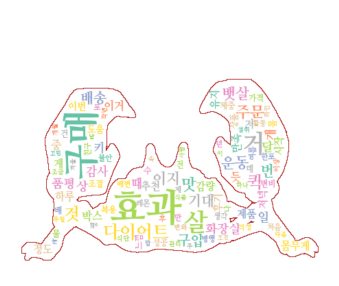

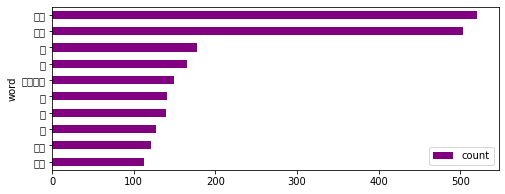

1
겨울이라서 지방을 축적하나 싶어서 다이어트 도전하느라 먹었던 이지퀵~
현재 4키로 빠지고 재구매했습니다 ㅋㅋ안할래야 안할수가..ㅋㅋㅋ
먹어보니 이거만큼 좋은게 없는거같아여
이지퀵 먹으면서 운동도 같이 하니까 효과가 더 빨리오는거같네요
살이 쭉쭉쭉ㅋㅋㅋ몸무게 올라갈때마다 기분이 좋습니다.
여기서 3키로는 금방 더 뺄 수 있을거같네용!!
2
이지퀵다이어트 후기입니다.
몇 년 째 계속 복용중인데, 효과는 모르겠지만 끊을 수가 없네요 ㅋㅋ
그만 먹으면 바로 살이 붙을 것 같은 무서운 느낌..;;
다 심리적인 효과 때문인 것 같기도 하지만.
다이어트에 작은 부분이라도 도움이 되면 된거죠.
가격이 부담되어 끊으려다가 또 주문했습니다.
3
이것저것 다이어트 다해보다가 최근에 날씬해진 직원 비법물어보니 이지퀵 말하길래 구매했어요.   뱃살에는 확실히 효과있는지..뱃살이 꽉 끼던 유니폼 바지가 덜 죄여서 살맛나요.


In [80]:
for num in range(1):
    df = gmarket_pos[gmarket_pos['title'] == title.index[num]]
    words = []
    for data in df.review:
        words.extend(mecab.nouns(data))
    new_nouns = [each_word for each_word in words if each_word not in stopwords]
    words = nltk.Text(new_nouns, name='words')
    data = words.vocab().most_common(100)
    wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
                          mask=custom_mask,
                          background_color='white',margin=1,contour_width=1,contour_color='firebrick',colormap='Set2').generate_from_frequencies(dict(data))
    plt.figure(figsize=(8,5))
    plt.imshow(wc,
          interpolation='bilinear')
    plt.axis('off')
    plt.show()
    worddf = pd.DataFrame(data,columns=['word','count'])
    fig, ax = plt.subplots(figsize=(8,3))
    worddf[:10].sort_values(by='count').plot.barh(x='word',
                                           y='count',
                                           ax=ax,
                                           color='purple')

    plt.show()
    wordrank = []
    for num in range(10):
        wordrank.append(worddf.word[num])
    # 리뷰에 포함되어있는 단어 갯수
    rate = []
    # 리뷰의 총 길이
    text_len = []
    for rev in df.review:
        count = 0
        for data in wordrank:
            if data in rev:
                count += 1
        rate.append(count)
        text_len.append(len(rev))
    df['rate'] = rate
    df['text_len'] = text_len
    # rank 단어 포함 갯수 별로 정렬
    new_df = df.sort_values(by='rate', ascending=False)
    # 리뷰 길이를 평균 길이 이상으로 설정
    new_df2 = new_df[text_len >= new_df.text_len.sum() / len(new_df)]
    # 각 리뷰별 번호매기기
    rev_num = 1
    for data in new_df2.review[:3]:
        print(rev_num)
        print(data)
        rev_num += 1

부정리뷰 wordcloud

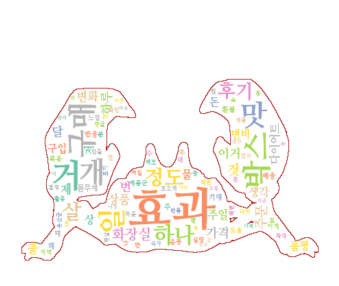

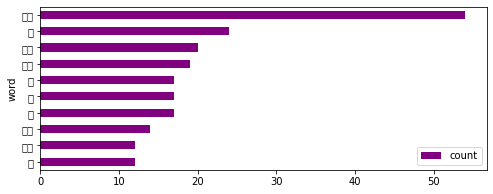

1
제가 잘못 이해했네요...
41900×2개를 결재해야 4개가 오는건데..
무슨 생각이었는지 하나만 결재하면
4개가 오는 줄 알고
한박스만 받고 황당해하고 있네요...
30개짜리 4만원이면 결재 안 했을낀데...
하나 더 구매하고 4박스 받을수 있으면
그리 하려구요...
아이고...이거 먹고 진짜 살이나 빠지면 좋겠네요
2
전두번째구매예요
첫번째구매시두달먹었을때
전혀효과없었어요 효과없음환불?귀찮아서
안했고실제로도 귀찮고번거러워서 효과없어도안한사람들이 대부분일거예요
근데왜주문했냐?평소물마시는습관이 너무부족하고
맹물은잘못마시다보니 맛좋은이지퀵타서
먹음잘넘어가더라구요
다이어트효과기대보단 그냥맛난 물섭취개념으로다가
샀어요 맛은좋아요
3
받고 섭취한지 14일차 정도 됐구~살빠지는 효과는 
없는듯...걍 유지만 되는 정도랄까~
가격이 넘 사악해서 재구매눈 생각 좀 해봐야할듯~
맛은 이온움료비스므리한 맛~~


In [79]:
for num in range(1):
    df = gmarket_neg[gmarket_neg['title'] == title.index[0]]
    words = []
    for data in df.review:
        words.extend(mecab.nouns(data))
    new_nouns = [each_word for each_word in words if each_word not in stopwords]
    words = nltk.Text(new_nouns, name='words')
    data = words.vocab().most_common(100)
    wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
                          mask=custom_mask,
                          background_color='white',margin=1,contour_width=1,contour_color='firebrick',colormap='Set2').generate_from_frequencies(dict(data))
    plt.figure(figsize=(8,5))
    plt.imshow(wc,
          interpolation='bilinear')
    plt.axis('off')
    plt.show()
    worddf = pd.DataFrame(data,columns=['word','count'])
    fig, ax = plt.subplots(figsize=(8,3))
    worddf[:10].sort_values(by='count').plot.barh(x='word',
                                           y='count',
                                           ax=ax,
                                           color='purple')

    plt.show()
    wordrank = []
    for num in range(10):
        wordrank.append(worddf.word[num])
    # 리뷰에 포함되어있는 랭크 단어 갯수
    rate = []
    # 리뷰의 총 길이
    text_len = []
    for rev in df.review:
        count = 0
        for data in wordrank:
            if data in rev:
                count += 1
        rate.append(count)
        text_len.append(len(rev))
    df['rate'] = rate
    df['text_len'] = text_len
    # rank 단어 포함 갯수 별로 정렬
    new_df = df.sort_values(by=['rate','text_len'], ascending=False)
    new_df2 = new_df[new_df['text_len'] > new_df.text_len.sum()/len(new_df)*4]
    # 각 리뷰별 번호매기기
    rev_num = 1
    for data in new_df2.review[:3]:
        print(rev_num)
        print(data)
        rev_num += 1